# Problema 1
# a)
Código para encontrar los parámetros de maximum likelihood:

In [2]:
%matplotlib inline

import numpy as np
from numpy import *
import matplotlib.pylab as plt
from matplotlib.pyplot import *
import scipy.stats as sp

with open('datos.dat') as g:
    t,y,err = np.genfromtxt(g, usecols=(0,1,2), unpack=True, dtype=float)
g.close()

In [85]:
n=len(t)
t1=0.4
t4=0.7

filt = (t1<t) & (t<t4)      

col1 = np.zeros(n)
for i in range(n):   
    if filt[i] == True:
        col1[i] = -1

M = col1

p=5    #Defino el grado del polinomio a ajustar

#Armo la matriz de diseño:
for i in range(p+1):
    M = np.column_stack((M, t**i))

B = np.linalg.inv(np.matmul(M.T,M))
C = np.matmul(M.T,y)
param = np.matmul(B,C)

greek_char = unichr(0x3b4).encode('utf-8')

# print u"\u03B4"

print 'PARÁMETROS:\n'
print greek_char,'= %8.6f'% (param[0]), '\nC_0 = %8.6f \nC_1 = %8.6f \nC_2 = %8.6f \nC_3 = %8.6f \nC_4 = %8.6f \nC_5 = %8.6f'% (param[1], param[2], param[3], param[4], param[5], param[6])

PARÁMETROS:

δ = 0.000101 
C_0 = 0.998870 
C_1 = 0.012203 
C_2 = -0.045056 
C_3 = 0.074225 
C_4 = -0.056351 
C_5 = 0.016240


# b)
Graficamos el ajuste a los datos con los parámetros obtenidos anteriormente

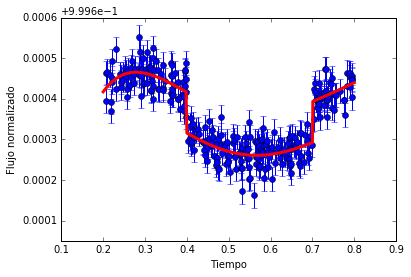

In [104]:
b = linspace(0.2, 0.4, 100, endpoint=False)
a = linspace(0.8, 0.7, 100, endpoint=False)
c = linspace(0.4, 0.7, 100)
a = a[::-1]
x = np.append(b,c)
x = np.append(x,a)

z = (param[6]*b**5 + param[5]*b**4 + param[4]*b**3 + param[3]*b**2 + param[2]*b + param[1])
z1 = (param[6]*c**5 + param[5]*c**4 + param[4]*c**3 + param[3]*c**2 + param[2]*c + param[1])-param[0]
z2 = (param[6]*a**5 + param[5]*a**4 + param[4]*a**3 + param[3]*a**2 + param[2]*a + param[1])
z = np.append(z,z1)
z = np.append(z,z2)


plt.errorbar(t, y, err, fmt='o', color='blue')
plt.plot(x, z, color='red', linewidth=3)
plt.xlim(0.1, 0.9)
plt.ylim(0.99965, 1.0002)

plt.xlabel('Tiempo')
plt.ylabel('Flujo normalizado')
plt.savefig('plot_1.pdf')
plt.show()

# c)
Hacemos ahora el test de chi-cuadrado

In [105]:
K = (y) - np.matmul(M,param)
err = np.array(err)
err1 = err**2
V = np.diag(err1)

V1 = np.linalg.inv(V)

chi=np.matmul(np.matmul(K.T,V1),K)
print chi
chi2_dof = (chi)/(len(y) - 7)
print chi2_dof

324.015142784
1.10585372964


calculamos el p-value para el ajuste realizado

In [108]:
from scipy.special import chdtr as Chi2CDF       #Chi square CDF. Returns the area under the left hand tail (from 0 to x) of the Chi square probability density function with v degrees of freedom
from scipy.special import chdtrc as Chi2Survival #Chi square survival function. Returns the area under the right hand tail (from x to infinity) of the Chi square probability density function with v degrees of freedom

print '1 - pvalue =',Chi2CDF(len(y)-7, chi)
print 'pvalue =',Chi2Survival(len(y)-7, chi) 

1 - pvalue = 0.897230336869
pvalue = 0.102769663131
